### Logistic Regression

In [59]:
ls ./data-files

CardioGoodFitness-1.csv    auto-mpg.csv
HR_comma_sep.csv           titanic-training-data.csv


In [60]:
# import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('./data-files/titanic-training-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.shape

(891, 12)

In [64]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Analyze the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

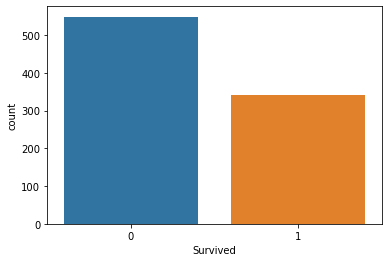

In [65]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

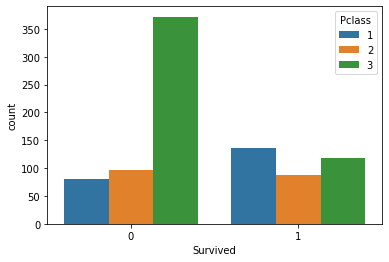

In [66]:
sns.countplot(x="Survived",hue="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

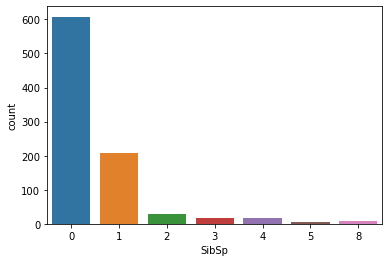

In [67]:
sns.countplot(x="SibSp",data=df)

#### Data Wrangling

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

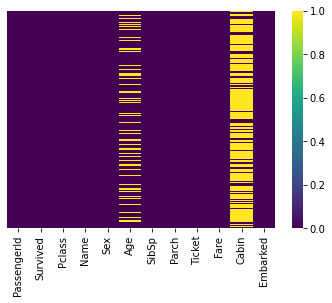

In [69]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

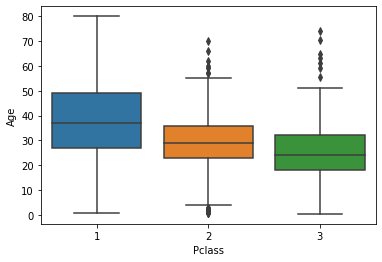

In [70]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [71]:
df.drop("Cabin",axis=1,inplace=True)

In [72]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S


In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(712, 11)

<AxesSubplot:>

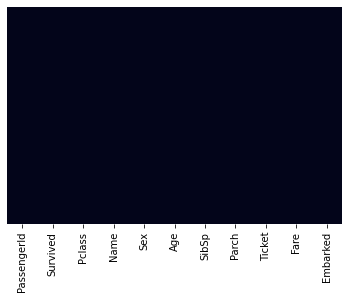

In [75]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
Sex = pd.get_dummies(df['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [78]:
Sex = pd.get_dummies(df['Sex'], drop_first = True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [79]:
embark = pd.get_dummies(df['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [80]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [81]:
pcl = pd.get_dummies(df['Pclass'], drop_first = True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [82]:
df = pd.concat([df,Sex,embark,pcl], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [83]:
df.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass','Fare'], axis = 1, inplace = True)
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


#### Split the Data

In [84]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 97)
#print(x_train, x_test, y_train, y_test)

#### Fit the Model

In [86]:
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/agurbaxani/opt/anaconda3/envs/spyder505/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
predictions = model.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8457943925233645

In [89]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       123
           1       0.89      0.73      0.80        91

    accuracy                           0.85       214
   macro avg       0.86      0.83      0.84       214
weighted avg       0.85      0.85      0.84       214



#### Confusion Matrix
    Predict -> P
    Actual -> A

<table>
    <tr>
        <td>P\A</td>
        <td>+ve</td>
        <td>-ve</td>
    </tr>
    <tr>
        <td>True</td>
        <td><font color=green>TP</font></td>
        <td><font color=red>TN</font></td>
    </tr>
    <tr>
        <td>False</td>
        <td><font color=red>FP</font></td>
        <td><font color=green>TP</font></td>
    </tr>
</table>

<AxesSubplot:>

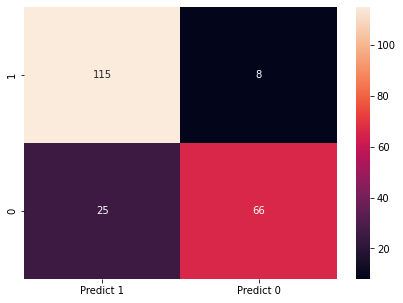

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

##### how good the model is?

### Decision Tree Classifier Model

In [91]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier Model

In [92]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=97)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=97)

#### Scoring our Decision Tree

In [93]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9538152610441767
0.7990654205607477


#### Decision Tree Classifier with Max Depth (Reduced

In [94]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', random_state=97, max_depth=4)
dTreeR.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=97)

In [95]:
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.8253012048192772
0.8177570093457944


#### Ensemble Learning - Bagging Classifier

In [96]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [179]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=43,random_state=97)
bgcl = bgcl.fit(x_train, y_train)

In [180]:
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test, y_test))

0.7850467289719626


<AxesSubplot:>

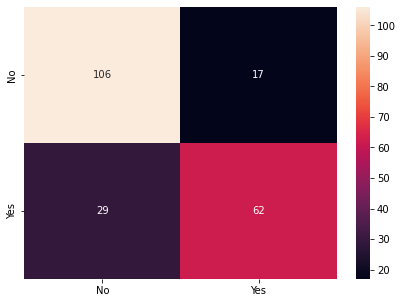

In [181]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Visualizing the Decision Tree

In [100]:
#train_char_label = ['No','Yes']

#### Ensemble Learning - Ada Boost Classifier

In [120]:
from sklearn.ensemble import AdaBoostClassifier
abc1 = AdaBoostClassifier( n_estimators=5, random_state=97)
abc1 = abc1.fit(x_train, y_train)

0.8317757009345794


<AxesSubplot:>

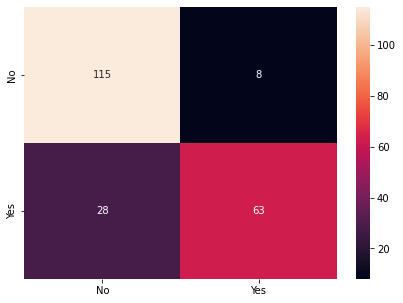

In [121]:
y_predict = abc1.predict(x_test)
print(abc1.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Ensemble Learning - Gradient Boost

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier( n_estimators=5, random_state=97)
gbc1 = gbc1.fit(x_train, y_train)

0.8177570093457944


<AxesSubplot:>

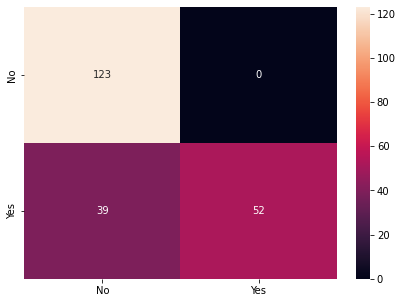

In [132]:
y_predict = gbc1.predict(x_test)
print(gbc1.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Ensemble - Random Forest Classifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=43, random_state=97, max_features=5) #total=8
rfc1 = rfc1.fit(x_train, y_train)

0.794392523364486


<AxesSubplot:>

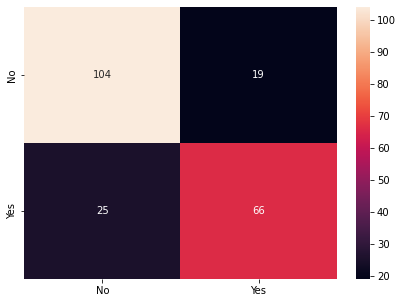

In [178]:
y_predict = rfc1.predict(x_test)
#print(rfc1.score(x_train, y_train))
print(rfc1.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### Tinanic Dataset
    RandomForest- 0.7943
    GradientBoosting- 0.8177
    AdaBoost- 0.8317
    Bagging- 0.7850
    DecisionTree(with max depth)- 0.8177
    DecisionTree- 0.7990
    LogisticRegression- 0.8457